**DATASET OASIS**

________________________________________________________________________________
UNIVERSIDAD AUTÓNOMA DE CHIHUAHUA

FACULTAD DE INGENIERÍA

MAESTRÍA EN INGENIERÍA EN COMPUTACIÓN

MATERIA: MACHINE LEARNING

DOCENTE: OLANDA PRIETO ORDAZ

PROYECTO FINAL DE LA MATERIA

ALUMNO: HEBER ABRAHAM ZAPATA ROBLES

MATRÍCULA: 329454
________________________________________________________________________________

Representación esquemática del preprocesamiento:

---


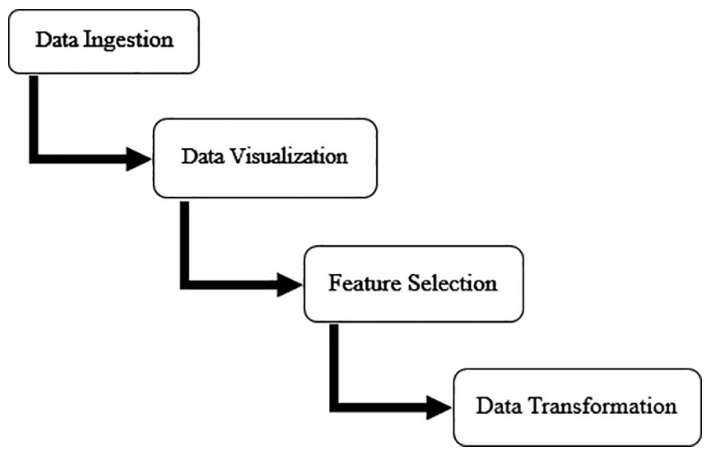

a) **Data ingestion**:

1. Recopilar datos
2. Importar librerías
3. Importar dataset

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# obtener datos
ruta = '/content/drive/MyDrive/Maestría/Primer semestre/ML/oasis_dataset/oasis_longitudinal_demographics-8d83e569fa2e2d30.xlsx'
oasis = pd.read_excel (ruta)
oasis_copy = oasis.copy()

b) **Data visualization**:
1. Identificar outliers
2. Distribución de los datos
3. Identificar correlación

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.121584    0.729556    1.195460  
std      3.683244    0.374557   176.135956    0.037141    0.138105  
min      4.000000    0.000000  1105.652499    0.644399    0.875539  
25%     27.000000    0.0

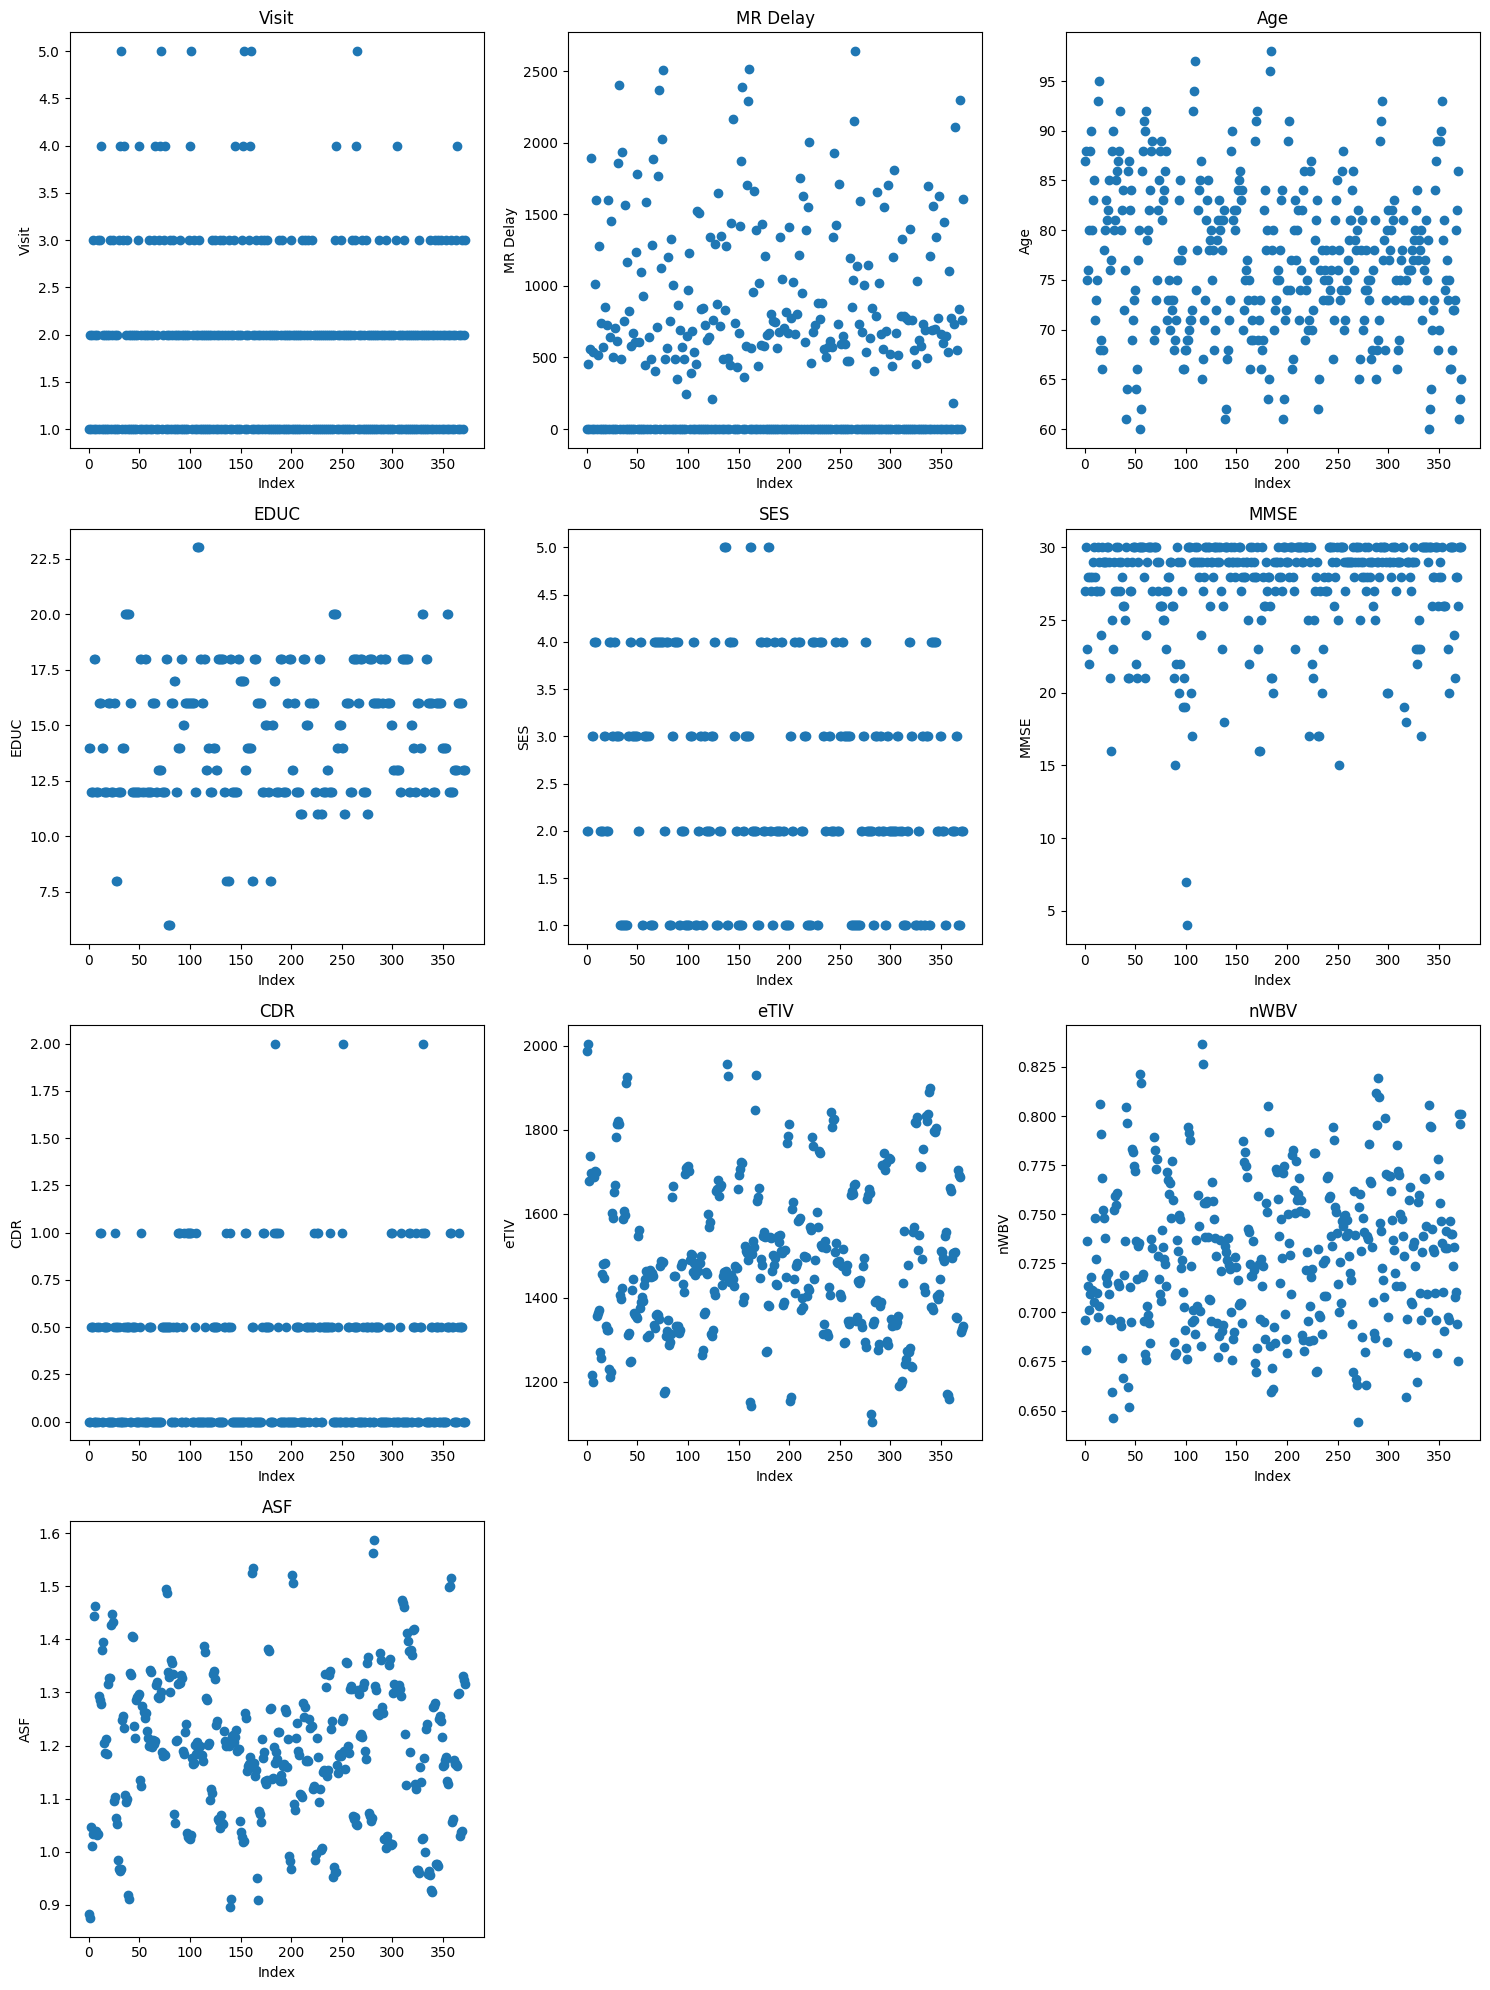

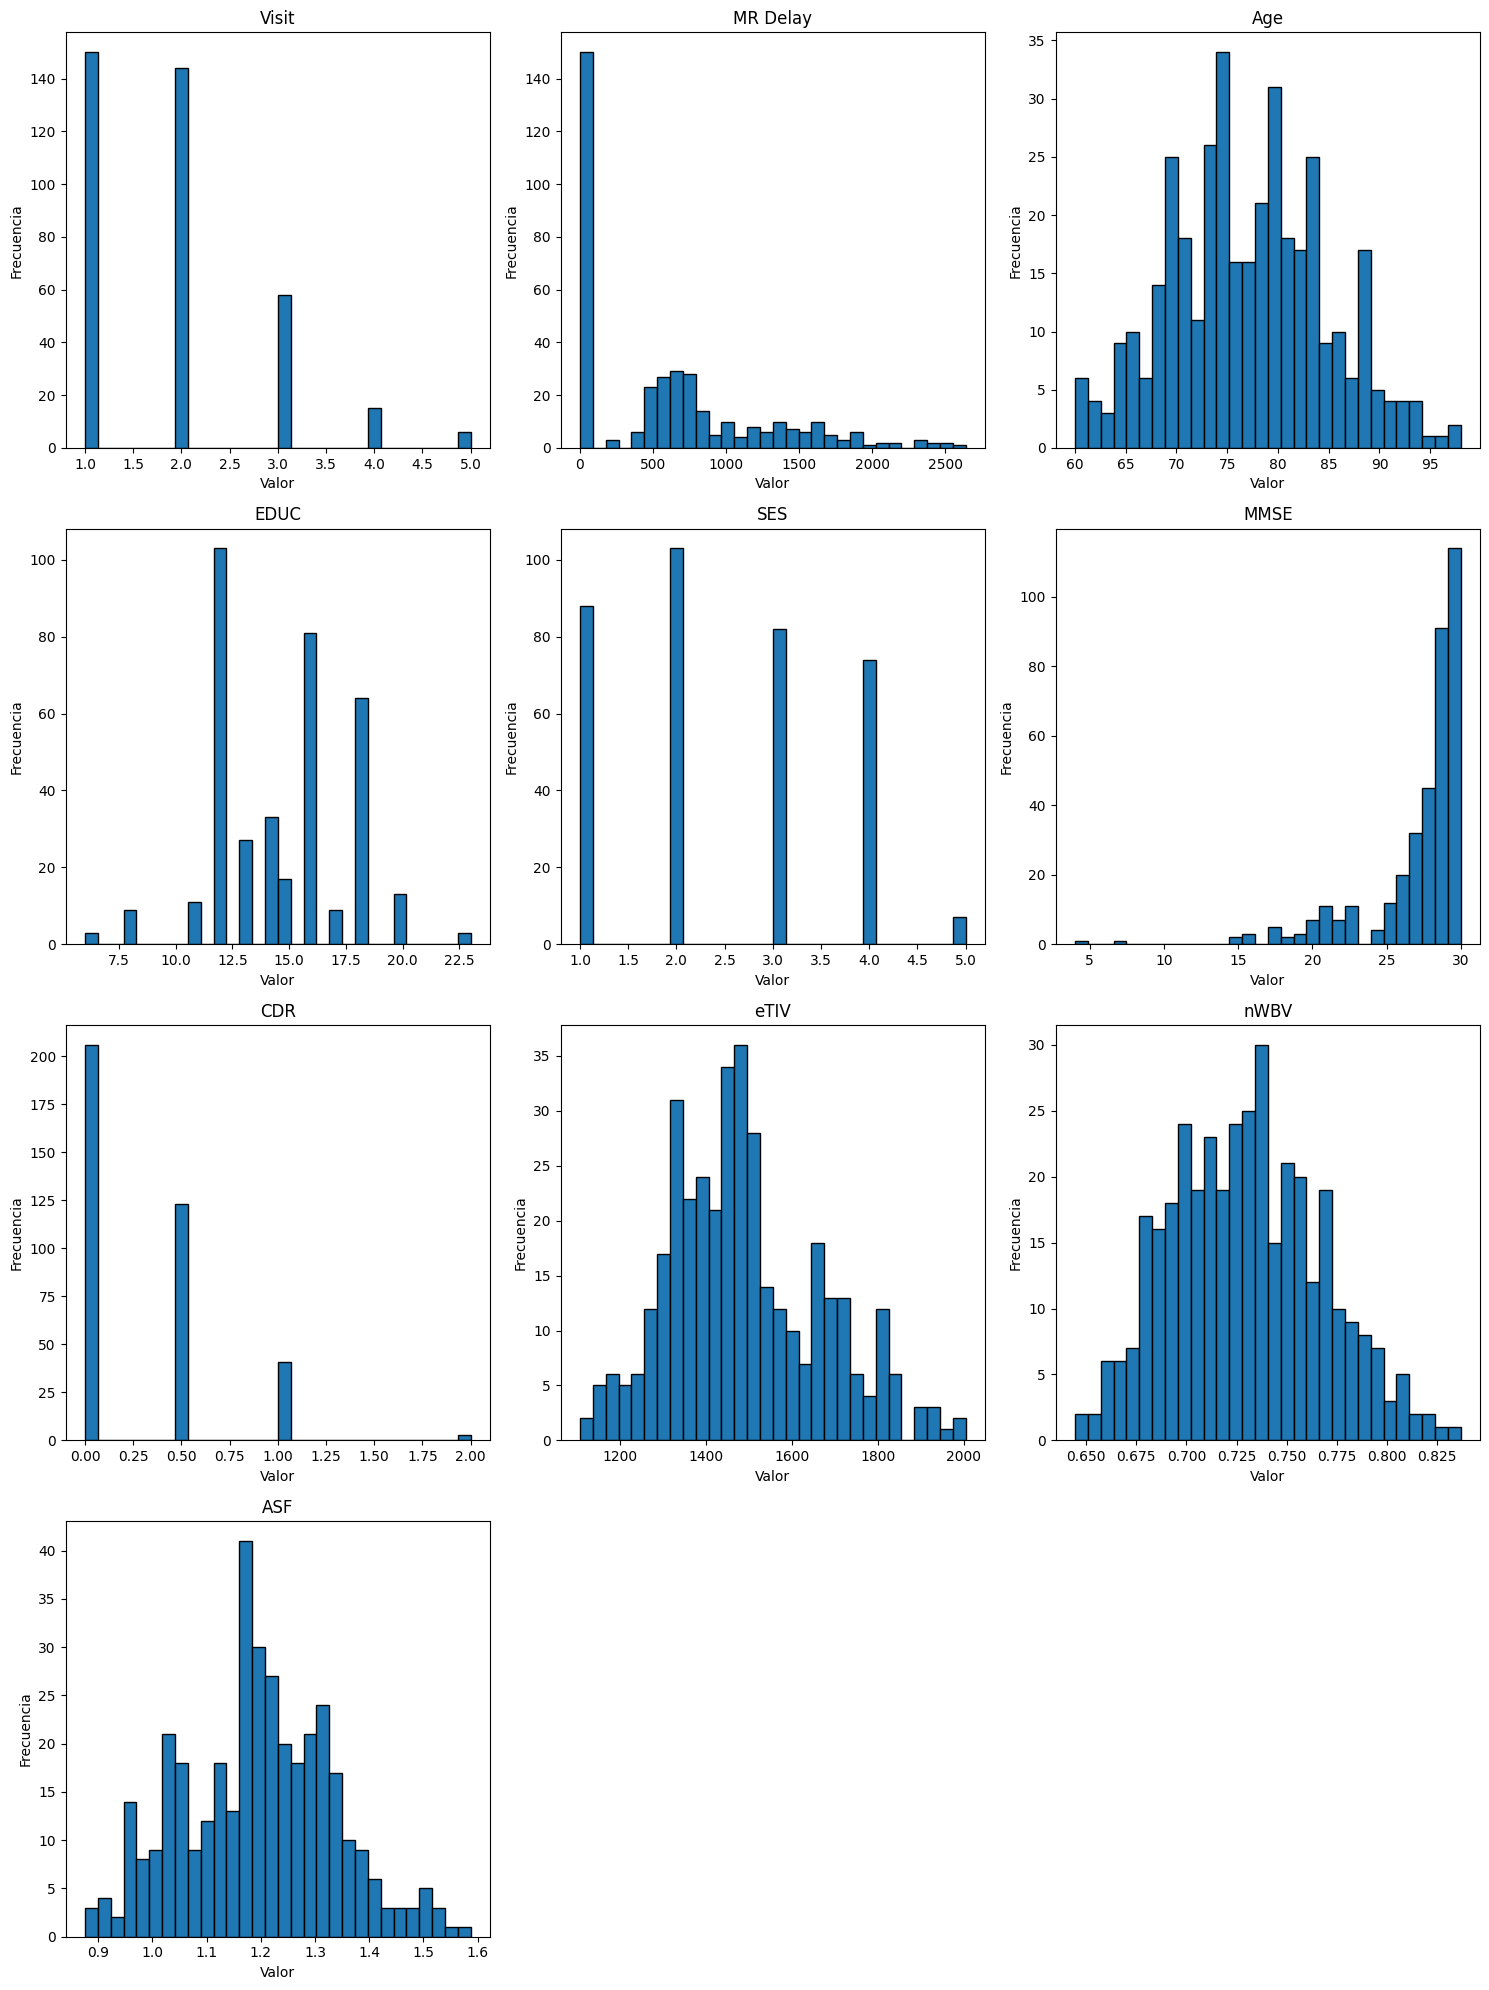

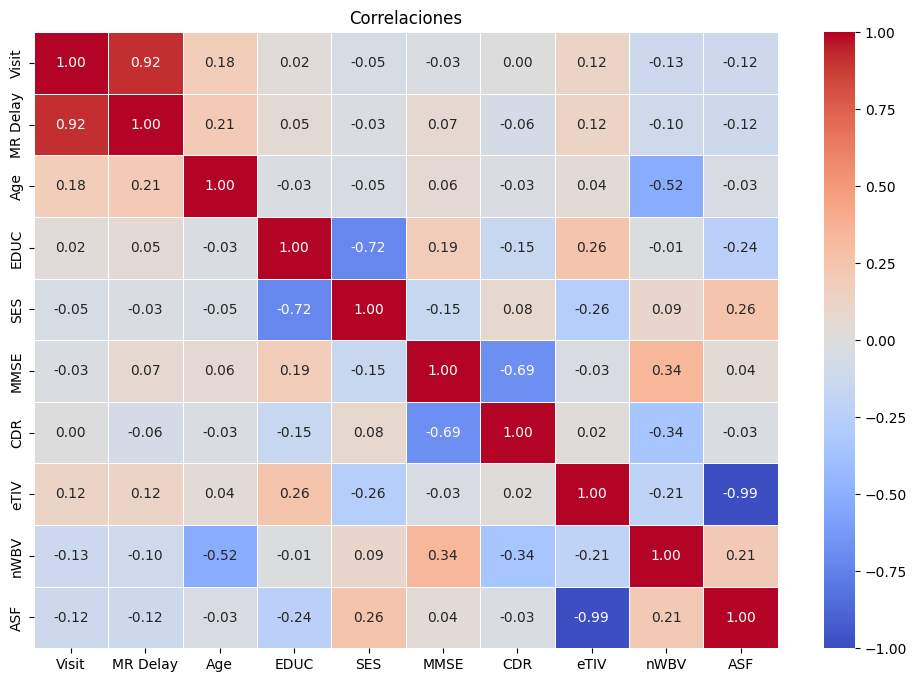

In [2]:
# descripción del dataset
print(oasis.describe())
# información del dataset
print(oasis.info())
# dimensiones de oasis
print(oasis.shape)

# visualización de outliers
# nombres de las columnas numéricas
name_cols = oasis_copy.select_dtypes(include=[np.number]).columns
# subplots
n = len(name_cols)
cols = 3
rows = (n + cols - 1) // cols
# figura
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
# aplanar el array de ejes
axes = axes.flatten()
# crear un gráfico en cada subplot
for i, col in enumerate(name_cols):
    axes[i].scatter(oasis.index, oasis[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
# ocultar los subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# ajustar layout
plt.tight_layout()
# mostrar figura
plt.show()

# distribución de datos
# nombres de las columnas numéricas
name_cols = oasis_copy.select_dtypes(include=[np.number]).columns
# subplots
n = len(name_cols)
cols = 3
rows = (n + cols - 1) // cols
# figura
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
# aplanar el array de ejes
axes = axes.flatten()
# crear un gráfico en cada subplot
for i, col in enumerate(name_cols):
    axes[i].hist(oasis_copy[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
# ocultar los subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# ajustar layout
plt.tight_layout()
# mostrar figura
plt.show()

# correlación
# seleccionar datos numéricos
numeric_data = oasis_copy.select_dtypes(include=[np.number])
# matriz de correlación
correlation_matrix = numeric_data.corr()
# hitmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlaciones')
plt.show()

d) **Transformación de los datos**:
1. Manejo de datos vacíos: eliminar e imputar
2. Codificación de características
3. Escalar datos: estandarización

Este proceso se realizo dos veces: con los pacientes sin datos longitudinales (150) y con cada dato como un paciente distinto (373).

In [3]:
# dataset 150

# crear dataset de 150, por la visita 1
# valores únicos en visit
valores_unicos = oasis['Visit'].unique()
print(valores_unicos)
# selección de datos por visita
oasis_select = oasis.loc[oasis['Visit'] == 1].reset_index(drop=True)
oasis_select
# copia para manipulación
oasis_new = oasis_select
# eliminar columnas inecesarias
columnas_innecesarias = ['Subject ID', 'MRI ID', 'Visit', 'Hand']
oasis_new = oasis_new.drop(columns=columnas_innecesarias)
oasis_new
# datos vacíos
print(oasis_new.info())
media_columna = oasis_new['SES'].mean()
# Llenar los valores vacíos con la media
oasis_new['SES'].fillna(media_columna, inplace=True)
# volver a revisar datos vacíos
print(oasis_new.info())
# convertir converted en demented
# datos en target
valores_unicos = oasis_new['Group'].unique()
print(valores_unicos)
# cambiar converted por demented
oasis_new['Group'] = oasis_new['Group'].replace('Converted', 'Demented')
# datos en target
valores_unicos = oasis_new['Group'].unique()
print(valores_unicos)
# conteo (78D, 72ND)
conteo_categorias = oasis_new['Group'].value_counts()
# mostrar los resultados
print(conteo_categorias)
# convertir datos de target en numéricas
# diccionario para la conversión
mapeo = {'Nondemented': 0, 'Demented': 1}
# convertir valores de target usando diccionario
oasis_new['Group'] = oasis_new['Group'].map(mapeo)
# ver resultados
print(oasis_new['Group'].value_counts())
# variables categoricas
encoder = OneHotEncoder(sparse_output=False, drop='first')
gender_df = oasis_new[['M/F']]
encoded_gender = encoder.fit_transform(gender_df)
gender = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['M/F']))
gender
# cambiar gender en oasis_new
oasis_new = oasis_new.drop(columns=['M/F'])
oasis_new = pd.concat([oasis_new, gender], axis=1)
oasis_new = oasis_new.rename(columns={'M/F_M': 'Gender'})
print(oasis_new.head())
# dividir target y características
X_150 = oasis_new.drop(columns='Group')
y_150 = oasis_new['Group']
# estandarizar datos
scaler = StandardScaler()
# Ajustar el escalador y transformar los datos
X_150 = scaler.fit_transform(X_150)
print(X_150)
# separación del dataset, manteniendo la proporción del target
X_150_train, X_150_test, y_150_train, y_150_test = train_test_split(X_150, y_150, test_size=0.2, random_state=42, stratify=y_150)
# verificar la separacion
# set entrenamiento
train_class_distribution = pd.Series(y_150_train).value_counts(normalize=True)
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_distribution)
# set prueba
test_class_distribution = pd.Series(y_150_test).value_counts(normalize=True)
print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_distribution)

[1 2 3 4 5]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     150 non-null    object 
 1   MR Delay  150 non-null    int64  
 2   M/F       150 non-null    object 
 3   Age       150 non-null    int64  
 4   EDUC      150 non-null    int64  
 5   SES       142 non-null    float64
 6   MMSE      150 non-null    float64
 7   CDR       150 non-null    float64
 8   eTIV      150 non-null    float64
 9   nWBV      150 non-null    float64
 10  ASF       150 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 13.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     150 non-null    object 
 1   MR Delay  150 non-null    int64  
 2   M/F       150 non-null    object 
 3   Age

<ipython-input-3-25935825a7df>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oasis_new['SES'].fillna(media_columna, inplace=True)


In [4]:
# dataset 373

# eliminar columnas inecesarias
columnas_innecesarias = ['Subject ID', 'MRI ID', 'Visit', 'Hand']
oasis_copy = oasis_copy.drop(columns=columnas_innecesarias)
# variables categoricas
encoder = OneHotEncoder(sparse_output=False, drop='first')
gender_df = oasis_copy[['M/F']]
encoded_gender = encoder.fit_transform(gender_df)
gender = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['M/F']))
gender
# cambiar gender en oasis_new
oasis_copy = oasis_copy.drop(columns=['M/F'])
oasis_copy = pd.concat([oasis_copy, gender], axis=1)
oasis_copy = oasis_copy.rename(columns={'M/F_M': 'Gender'})
print(oasis_new.head())
# convertir converted en demented
# datos en target
valores_unicos = oasis_copy['Group'].unique()
print(valores_unicos)
# cambiar converted por demented
oasis_copy['Group'] = oasis_copy['Group'].replace('Converted', 'Demented')
# datos en target
valores_unicos = oasis_copy['Group'].unique()
print(valores_unicos)
# conteo (78D, 72ND)
conteo_categorias = oasis_copy['Group'].value_counts()
# mostrar los resultados
print(conteo_categorias)
# datos vacíos iniciales
print(oasis_copy.info())
# revisar datos faltantes
columnas_nan = oasis_copy.select_dtypes(include=['float', 'int']).columns
# rellenar con la media
for columna in columnas_nan:
    media_columna = oasis_copy[columna].mean()
    oasis_copy[columna].fillna(media_columna, inplace=True)
# revisar los datos vacíos
print(oasis_copy.info())
# dividir target y características
X_373 = oasis_copy.drop(columns='Group')
y_373 = oasis_copy['Group']
# estandarizar datos
scaler = StandardScaler()
# Ajustar el escalador y transformar los datos
X_373 = scaler.fit_transform(X_373)
print(X_373)
# separación del dataset, manteniendo la proporción del target
X_373_train, X_373_test, y_373_train, y_373_test = train_test_split(X_373, y_373, test_size=0.2, random_state=42, stratify=y_373)
# verificar la separacion
# set entrenamiento
train_class_distribution = pd.Series(y_373_train).value_counts(normalize=True)
print("Distribución de clases en el conjunto de entrenamiento:")
print(train_class_distribution)
# set prueba
test_class_distribution = pd.Series(y_373_test).value_counts(normalize=True)
print("\nDistribución de clases en el conjunto de prueba:")
print(test_class_distribution)

   Group  MR Delay  Age  EDUC       SES  MMSE  CDR     eTIV      nWBV  \
0      0         0   87    14  2.000000  27.0  0.0  1986.55  0.696106   
1      1         0   75    12  2.492958  23.0  0.5  1678.29  0.736336   
2      0         0   88    18  3.000000  28.0  0.0  1215.33  0.709512   
3      0         0   80    12  4.000000  28.0  0.0  1688.58  0.711502   
4      1         0   71    16  2.492958  28.0  0.5  1357.33  0.748085   

       ASF  Gender  
0  0.88344     1.0  
1  1.04571     1.0  
2  1.44406     0.0  
3  1.03933     1.0  
4  1.29298     1.0  
['Nondemented' 'Demented' 'Converted']
['Nondemented' 'Demented']
Group
Nondemented    190
Demented       183
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   MR Delay  373 non-null    int64  
 2   Age       373 non-null    int64  

<ipython-input-4-f34eac69b933>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oasis_copy[columna].fillna(media_columna, inplace=True)


Regresión lineal:

Accuracy: 0.90
Matriz de confusión:
[[14  0]
 [ 3 13]]
Métricas:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.81      0.90        16

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



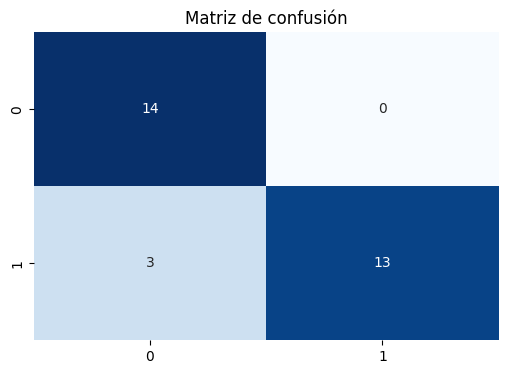


////////////////////////////////////////////////////////////////

Accuracy: 0.99
Matriz de confusión:
[[36  1]
 [ 0 38]]
Métricas:
              precision    recall  f1-score   support

    Demented       1.00      0.97      0.99        37
 Nondemented       0.97      1.00      0.99        38

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



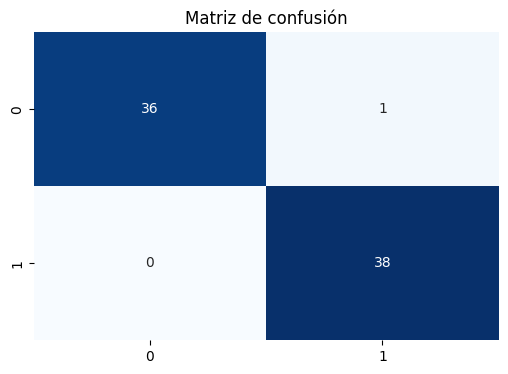

In [5]:
# logistic regression train

# 150
reg_log_150 = LogisticRegression()
reg_log_150.fit(X_150_train, y_150_train)
# prueba
y_pred_150 = reg_log_150.predict(X_150_test)
# métricas
accuracy_150 = accuracy_score(y_150_test, y_pred_150)
print(f"Accuracy: {accuracy_150:.2f}")
conf_matrix_150 = confusion_matrix(y_150_test, y_pred_150)
print("Matriz de confusión:")
print(conf_matrix_150)
class_report_150 = classification_report(y_150_test, y_pred_150)
print("Métricas:")
print(class_report_150)
# matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_150, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.show()

print ("")
print ("////////////////////////////////////////////////////////////////")
print ("")

# 373
reg_log_373 = LogisticRegression()
reg_log_373.fit(X_373_train, y_373_train)
# prueba
y_pred_373 = reg_log_373.predict(X_373_test)
# métricas
accuracy_373 = accuracy_score(y_373_test, y_pred_373)
print(f"Accuracy: {accuracy_373:.2f}")
conf_matrix_373 = confusion_matrix(y_373_test, y_pred_373)
print("Matriz de confusión:")
print(conf_matrix_373)
class_report_373 = classification_report(y_373_test, y_pred_373)
print("Métricas:")
print(class_report_373)
# matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_373, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.show()

In [6]:
# 150 with KFold
# KFold
modelo_150 = LogisticRegression()
# instancia kfold
kf_150 = KFold(n_splits=5, shuffle=True, random_state=42)
# listas para métricas
accuracy_list_150 = []
precision_list_150 = []
recall_list_150 = []
f1_list_150 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_150.split(X_150), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_150, X_test_150 = X_150[train_index], X_150[test_index]
    y_train_150, y_test_150 = y_150[train_index], y_150[test_index]
    # entrenamiento
    modelo_150.fit(X_train_150, y_train_150)
    # predicción
    y_pred_150 = modelo_150.predict(X_test_150)
    # métricas
    accuracy_150 = accuracy_score(y_test_150, y_pred_150)
    precision_150 = precision_score(y_test_150, y_pred_150, average='weighted')
    recall_150 = recall_score(y_test_150, y_pred_150, average='weighted')
    f1_150 = f1_score(y_test_150, y_pred_150, average='weighted')
    # guardar métricas
    accuracy_list_150.append(accuracy_150)
    precision_list_150.append(precision_150)
    recall_list_150.append(recall_150)
    f1_list_150.append(f1_150)
    # imprimir fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_150}')
    print(f'Precision: {precision_150}')
    print(f'Recall: {recall_150}')
    print(f'F1 Score: {f1_150}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_150, y_pred_150)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_150, y_pred_150)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_150)}')
print(f'Promedio de precision: {np.mean(precision_list_150)}')
print(f'Promedio de recall: {np.mean(recall_list_150)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_150)}')

print ("")
print ("////////////////////////////////////////////////////////////////")
print ("")

# 373 with KFold
#KFold
modelo_373 = LogisticRegression()
# instancia kfold
kf_373 = KFold(n_splits=5, shuffle=True, random_state=42)
# listas para métricas
accuracy_list_373 = []
precision_list_373 = []
recall_list_373 = []
f1_list_373 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_373.split(X_373), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_373, X_test_373 = X_373[train_index], X_373[test_index]
    y_train_373, y_test_373 = y_373[train_index], y_373[test_index]
    # entrenamiento
    modelo_373.fit(X_train_373, y_train_373)
    # predicción
    y_pred_373 = modelo_373.predict(X_test_373)
    # métricas
    accuracy_373 = accuracy_score(y_test_373, y_pred_373)
    precision_373 = precision_score(y_test_373, y_pred_373, average='weighted')
    recall_373 = recall_score(y_test_373, y_pred_373, average='weighted')
    f1_373 = f1_score(y_test_373, y_pred_373, average='weighted')
    # guardar métricas
    accuracy_list_373.append(accuracy_373)
    precision_list_373.append(precision_373)
    recall_list_373.append(recall_373)
    f1_list_373.append(f1_373)
    # imprimir fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_373}')
    print(f'Precision: {precision_373}')
    print(f'Recall: {recall_373}')
    print(f'F1 Score: {f1_373}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_373, y_pred_373)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_373, y_pred_373)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_373)}')
print(f'Promedio de precision: {np.mean(precision_list_373)}')
print(f'Promedio de recall: {np.mean(recall_list_373)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_373)}')


Fold 1:
Accuracy: 0.8666666666666667
Precision: 0.8909090909090909
Recall: 0.8666666666666667
F1 Score: 0.86
Matriz de confusión:
[[18  0]
 [ 4  8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30


Fold 2:
Accuracy: 0.9
Precision: 0.91875
Recall: 0.9
F1 Score: 0.900333704115684
Matriz de confusión:
[[13  0]
 [ 3 14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30


Fold 3:
Accuracy: 0.9

In [7]:
# logistic_150 regression con KFold y Gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
# modelo
modelo_150 = LogisticRegression()
# KFold
kf_150 = KFold(n_splits=5, shuffle=True, random_state=42)
# GridSearchCV
grid_search = GridSearchCV(estimator=modelo_150, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_150)
# entrenar gridsearch
grid_search.fit(X_150, y_150)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parametros
print(f'Mejores parámetros: {best_params}')
# lista para métricas
accuracy_list_150 = []
precision_list_150 = []
recall_list_150 = []
f1_list_150 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_150.split(X_150), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_150, X_test_150 = X_150[train_index], X_150[test_index]
    y_train_150, y_test_150 = y_150[train_index], y_150[test_index]
    # entrenamiento
    best_model.fit(X_train_150, y_train_150)
    # predicción
    y_pred_150 = best_model.predict(X_test_150)
    # métricas
    accuracy_150 = accuracy_score(y_test_150, y_pred_150)
    precision_150 = precision_score(y_test_150, y_pred_150, average='weighted')
    recall_150 = recall_score(y_test_150, y_pred_150, average='weighted')
    f1_150 = f1_score(y_test_150, y_pred_150, average='weighted')
    # guardar métricas
    accuracy_list_150.append(accuracy_150)
    precision_list_150.append(precision_150)
    recall_list_150.append(recall_150)
    f1_list_150.append(f1_150)
    # fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_150}')
    print(f'Precision: {precision_150}')
    print(f'Recall: {recall_150}')
    print(f'F1 Score: {f1_150}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_150, y_pred_150)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_150, y_pred_150)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_150)}')
print(f'Promedio de precision: {np.mean(precision_list_150)}')
print(f'Promedio de recall: {np.mean(recall_list_150)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_150)}')

Mejores parámetros: {'C': 10, 'solver': 'liblinear'}

Fold 1:
Accuracy: 0.8666666666666667
Precision: 0.8909090909090909
Recall: 0.8666666666666667
F1 Score: 0.86
Matriz de confusión:
[[18  0]
 [ 4  8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30


Fold 2:
Accuracy: 0.9
Precision: 0.91875
Recall: 0.9
F1 Score: 0.900333704115684
Matriz de confusión:
[[13  0]
 [ 3 14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
# logistic_373 regression con KFold y Gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
# modelo
modelo_373 = LogisticRegression()
# KFold
kf_373 = KFold(n_splits=5, shuffle=True, random_state=42)
# GridSearchCV
grid_search = GridSearchCV(estimator=modelo_373, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_373)
# entrenar gridsearch
grid_search.fit(X_373, y_373)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parametros
print(f'Mejores parámetros: {best_params}')
# lista para métricas
accuracy_list_373 = []
precision_list_373 = []
recall_list_373 = []
f1_list_373 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_373.split(X_373), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_373, X_test_373 = X_373[train_index], X_373[test_index]
    y_train_373, y_test_373 = y_373[train_index], y_373[test_index]
    # entrenamiento
    best_model.fit(X_train_373, y_train_373)
    # predicción
    y_pred_373 = best_model.predict(X_test_373)
    # métricas
    accuracy_373 = accuracy_score(y_test_373, y_pred_373)
    precision_373 = precision_score(y_test_373, y_pred_373, average='weighted')
    recall_373 = recall_score(y_test_373, y_pred_373, average='weighted')
    f1_373 = f1_score(y_test_373, y_pred_373, average='weighted')
    # guardar métricas
    accuracy_list_373.append(accuracy_373)
    precision_list_373.append(precision_373)
    recall_list_373.append(recall_373)
    f1_list_373.append(f1_373)
    # fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_373}')
    print(f'Precision: {precision_373}')
    print(f'Recall: {recall_373}')
    print(f'F1 Score: {f1_373}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_373, y_pred_373)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_373, y_pred_373)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_373)}')
print(f'Promedio de precision: {np.mean(precision_list_373)}')
print(f'Promedio de recall: {np.mean(recall_list_373)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_373)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mejores parámetros: {'C': 0.1, 'solver': 'liblinear'}

Fold 1:
Accuracy: 0.88
Precision: 0.8965527065527065
Recall: 0.88
F1 Score: 0.880599037261544
Matriz de confusión:
[[35  8]
 [ 1 31]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Demented       0.97      0.81      0.89        43
 Nondemented       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75


Fold 2:
Accuracy: 0.96
Precision: 0.9626666666666667
Recall: 0.96
F1 Score: 0.9597372742200329
Matriz de confusión:
[[30  3]
 [ 0 42]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Demented       1.00      0.91      0.95        33
 Nondemented       0.93      1.00      0.97        42

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96 

SVM lineal:

In [9]:
# svm_lineal_150 con KFold y Gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']  # solo kernel lineal
}
# modelo
modelo_150 = SVC()
# KFold
kf_150 = KFold(n_splits=5, shuffle=True, random_state=42)
# GridSearchCV
grid_search = GridSearchCV(estimator=modelo_150, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_150)
# entrenar gridsearch
grid_search.fit(X_150, y_150)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'Mejores parámetros: {best_params}')
# lista para métricas
accuracy_list_150 = []
precision_list_150 = []
recall_list_150 = []
f1_list_150 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_150.split(X_150), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_150, X_test_150 = X_150[train_index], X_150[test_index]
    y_train_150, y_test_150 = y_150[train_index], y_150[test_index]
    # entrenamiento
    best_model.fit(X_train_150, y_train_150)
    # predicción
    y_pred_150 = best_model.predict(X_test_150)
    # métricas
    accuracy_150 = accuracy_score(y_test_150, y_pred_150)
    precision_150 = precision_score(y_test_150, y_pred_150, average='weighted')
    recall_150 = recall_score(y_test_150, y_pred_150, average='weighted')
    f1_150 = f1_score(y_test_150, y_pred_150, average='weighted')
    # guardar métricas
    accuracy_list_150.append(accuracy_150)
    precision_list_150.append(precision_150)
    recall_list_150.append(recall_150)
    f1_list_150.append(f1_150)
    # fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_150}')
    print(f'Precision: {precision_150}')
    print(f'Recall: {recall_150}')
    print(f'F1 Score: {f1_150}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_150, y_pred_150)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_150, y_pred_150)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_150)}')
print(f'Promedio de precision: {np.mean(precision_list_150)}')
print(f'Promedio de recall: {np.mean(recall_list_150)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_150)}')

Mejores parámetros: {'C': 0.1, 'kernel': 'linear'}

Fold 1:
Accuracy: 0.8666666666666667
Precision: 0.8909090909090909
Recall: 0.8666666666666667
F1 Score: 0.86
Matriz de confusión:
[[18  0]
 [ 4  8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30


Fold 2:
Accuracy: 0.9
Precision: 0.91875
Recall: 0.9
F1 Score: 0.900333704115684
Matriz de confusión:
[[13  0]
 [ 3 14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92   

In [10]:
# svm_lineal_373 con KFold y Gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']  # solo kernel lineal
}
# modelo
modelo_373 = SVC()
# KFold
kf_373 = KFold(n_splits=5, shuffle=True, random_state=42)
# GridSearchCV
grid_search = GridSearchCV(estimator=modelo_373, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_373)
# entrenar gridsearch
grid_search.fit(X_373, y_373)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'Mejores parámetros: {best_params}')
# lista para métricas
accuracy_list_373 = []
precision_list_373 = []
recall_list_373 = []
f1_list_373 = []
# aplicar KFold
for fold, (train_index, test_index) in enumerate(kf_373.split(X_373), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_373, X_test_373 = X_373[train_index], X_373[test_index]
    y_train_373, y_test_373 = y_373[train_index], y_373[test_index]
    # entrenamiento
    best_model.fit(X_train_373, y_train_373)
    # predicción
    y_pred_373 = best_model.predict(X_test_373)
    # métricas
    accuracy_373 = accuracy_score(y_test_373, y_pred_373)
    precision_373 = precision_score(y_test_373, y_pred_373, average='weighted')
    recall_373 = recall_score(y_test_373, y_pred_373, average='weighted')
    f1_373 = f1_score(y_test_373, y_pred_373, average='weighted')
    # guardar métricas
    accuracy_list_373.append(accuracy_373)
    precision_list_373.append(precision_373)
    recall_list_373.append(recall_373)
    f1_list_373.append(f1_373)
    # fold actual
    print(f'\nFold {fold}:')
    print(f'Accuracy: {accuracy_373}')
    print(f'Precision: {precision_373}')
    print(f'Recall: {recall_373}')
    print(f'F1 Score: {f1_373}')
    print(f'Matriz de confusión:\n{confusion_matrix(y_test_373, y_pred_373)}')
    print(f'Reporte de clasificación:\n{classification_report(y_test_373, y_pred_373)}')
# promedio de todas las métricas
print(f'\nPromedio de accuracy: {np.mean(accuracy_list_373)}')
print(f'Promedio de precision: {np.mean(precision_list_373)}')
print(f'Promedio de recall: {np.mean(recall_list_373)}')
print(f'Promedio de F1 Score: {np.mean(f1_list_373)}')

Mejores parámetros: {'C': 0.1, 'kernel': 'linear'}

Fold 1:
Accuracy: 0.88
Precision: 0.8965527065527065
Recall: 0.88
F1 Score: 0.880599037261544
Matriz de confusión:
[[35  8]
 [ 1 31]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Demented       0.97      0.81      0.89        43
 Nondemented       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75


Fold 2:
Accuracy: 0.96
Precision: 0.9626666666666667
Recall: 0.96
F1 Score: 0.9597372742200329
Matriz de confusión:
[[30  3]
 [ 0 42]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Demented       1.00      0.91      0.95        33
 Nondemented       0.93      1.00      0.97        42

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96    

SVM polinomial:

In [11]:
# svm polinomial_150 con kfold y gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3],  # grados del polinomio
    'kernel': ['poly']  # usar kernel polinomial
}
# modelo
modelo_150 = SVC()
# Kfold
kf_150 = KFold(n_splits=5, shuffle=True, random_state=42)
# Gridsearchcv
grid_search = GridSearchCV(estimator=modelo_150, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_150)
# entrenar gridsearch
grid_search.fit(X_150, y_150)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'mejores parámetros: {best_params}')
# listas para métricas
accuracy_list_150 = []
precision_list_150 = []
recall_list_150 = []
f1_list_150 = []
# aplicar kfold
for fold, (train_index, test_index) in enumerate(kf_150.split(X_150), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_150, X_test_150 = X_150[train_index], X_150[test_index]
    y_train_150, y_test_150 = y_150[train_index], y_150[test_index]
    # entrenamiento
    best_model.fit(X_train_150, y_train_150)
    # predicción
    y_pred_150 = best_model.predict(X_test_150)
    # métricas
    accuracy_150 = accuracy_score(y_test_150, y_pred_150)
    precision_150 = precision_score(y_test_150, y_pred_150, average='weighted')
    recall_150 = recall_score(y_test_150, y_pred_150, average='weighted')
    f1_150 = f1_score(y_test_150, y_pred_150, average='weighted')
    # guardar métricas
    accuracy_list_150.append(accuracy_150)
    precision_list_150.append(precision_150)
    recall_list_150.append(recall_150)
    f1_list_150.append(f1_150)
    # fold actual
    print(f'\nfold {fold}:')
    print(f'accuracy: {accuracy_150}')
    print(f'precision: {precision_150}')
    print(f'recall: {recall_150}')
    print(f'f1 score: {f1_150}')
    print(f'matriz de confusión:\n{confusion_matrix(y_test_150, y_pred_150)}')
    print(f'reporte de clasificación:\n{classification_report(y_test_150, y_pred_150)}')
# promedio de todas las métricas
print(f'\npromedio de accuracy: {np.mean(accuracy_list_150)}')
print(f'promedio de precision: {np.mean(precision_list_150)}')
print(f'promedio de recall: {np.mean(recall_list_150)}')
print(f'promedio de f1 score: {np.mean(f1_list_150)}')

mejores parámetros: {'C': 1, 'degree': 3, 'kernel': 'poly'}

fold 1:
accuracy: 0.8333333333333334
precision: 0.8412698412698413
recall: 0.8333333333333334
f1 score: 0.8278388278388279
matriz de confusión:
[[17  1]
 [ 4  8]]
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.67      0.76        12

    accuracy                           0.83        30
   macro avg       0.85      0.81      0.82        30
weighted avg       0.84      0.83      0.83        30


fold 2:
accuracy: 0.9
precision: 0.91875
recall: 0.9
f1 score: 0.900333704115684
matriz de confusión:
[[13  0]
 [ 3 14]]
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
wei

In [12]:
# svm polinomial_373 con kfold y gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3],  # grados del polinomio
    'kernel': ['poly']  # usar kernel polinomial
}
# modelo
modelo_373 = SVC()
# Kfold
kf_373 = KFold(n_splits=5, shuffle=True, random_state=42)
# Gridsearchcv
grid_search = GridSearchCV(estimator=modelo_373, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_373)
# entrenar gridsearch
grid_search.fit(X_373, y_373)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'mejores parámetros: {best_params}')
# listas para métricas
accuracy_list_373 = []
precision_list_373 = []
recall_list_373 = []
f1_list_373 = []
# aplicar kfold
for fold, (train_index, test_index) in enumerate(kf_373.split(X_373), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_373, X_test_373 = X_373[train_index], X_373[test_index]
    y_train_373, y_test_373 = y_373[train_index], y_373[test_index]
    # entrenamiento
    best_model.fit(X_train_373, y_train_373)
    # predicción
    y_pred_373 = best_model.predict(X_test_373)
    # métricas
    accuracy_373 = accuracy_score(y_test_373, y_pred_373)
    precision_373 = precision_score(y_test_373, y_pred_373, average='weighted')
    recall_373 = recall_score(y_test_373, y_pred_373, average='weighted')
    f1_373 = f1_score(y_test_373, y_pred_373, average='weighted')
    # guardar métricas
    accuracy_list_373.append(accuracy_373)
    precision_list_373.append(precision_373)
    recall_list_373.append(recall_373)
    f1_list_373.append(f1_373)
    # fold actual
    print(f'\nfold {fold}:')
    print(f'accuracy: {accuracy_373}')
    print(f'precision: {precision_373}')
    print(f'recall: {recall_373}')
    print(f'f1 score: {f1_373}')
    print(f'matriz de confusión:\n{confusion_matrix(y_test_373, y_pred_373)}')
    print(f'reporte de clasificación:\n{classification_report(y_test_373, y_pred_373)}')
# promedio de todas las métricas
print(f'\npromedio de accuracy: {np.mean(accuracy_list_373)}')
print(f'promedio de precision: {np.mean(precision_list_373)}')
print(f'promedio de recall: {np.mean(recall_list_373)}')
print(f'promedio de f1 score: {np.mean(f1_list_373)}')

mejores parámetros: {'C': 1, 'degree': 3, 'kernel': 'poly'}

fold 1:
accuracy: 0.88
precision: 0.8965527065527065
recall: 0.88
f1 score: 0.880599037261544
matriz de confusión:
[[35  8]
 [ 1 31]]
reporte de clasificación:
              precision    recall  f1-score   support

    Demented       0.97      0.81      0.89        43
 Nondemented       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75


fold 2:
accuracy: 0.96
precision: 0.9626666666666667
recall: 0.96
f1 score: 0.9597372742200329
matriz de confusión:
[[30  3]
 [ 0 42]]
reporte de clasificación:
              precision    recall  f1-score   support

    Demented       1.00      0.91      0.95        33
 Nondemented       0.93      1.00      0.97        42

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg      

SVM gaussiano:

In [13]:
# svm gaussiano_150 con kfold y gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],  # opciones de gamma
    'kernel': ['rbf']  # usar kernel gaussiano
}
# modelo
modelo_150 = SVC()
# Kfold
kf_150 = KFold(n_splits=5, shuffle=True, random_state=42)
# Gridsearchcv
grid_search = GridSearchCV(estimator=modelo_150, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_150)
# entrenar gridsearch
grid_search.fit(X_150, y_150)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'mejores parámetros: {best_params}')
# listas para métricas
accuracy_list_150 = []
precision_list_150 = []
recall_list_150 = []
f1_list_150 = []
# aplicar kfold
for fold, (train_index, test_index) in enumerate(kf_150.split(X_150), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_150, X_test_150 = X_150[train_index], X_150[test_index]
    y_train_150, y_test_150 = y_150[train_index], y_150[test_index]
    # entrenamiento
    best_model.fit(X_train_150, y_train_150)
    # predicción
    y_pred_150 = best_model.predict(X_test_150)
    # métricas
    accuracy_150 = accuracy_score(y_test_150, y_pred_150)
    precision_150 = precision_score(y_test_150, y_pred_150, average='weighted')
    recall_150 = recall_score(y_test_150, y_pred_150, average='weighted')
    f1_150 = f1_score(y_test_150, y_pred_150, average='weighted')
    # guardar métricas
    accuracy_list_150.append(accuracy_150)
    precision_list_150.append(precision_150)
    recall_list_150.append(recall_150)
    f1_list_150.append(f1_150)
    # fold actual
    print(f'\nfold {fold}:')
    print(f'accuracy: {accuracy_150}')
    print(f'precision: {precision_150}')
    print(f'recall: {recall_150}')
    print(f'f1 score: {f1_150}')
    print(f'matriz de confusión:\n{confusion_matrix(y_test_150, y_pred_150)}')
    print(f'reporte de clasificación:\n{classification_report(y_test_150, y_pred_150)}')
# promedio de todas las métricas
print(f'\npromedio de accuracy: {np.mean(accuracy_list_150)}')
print(f'promedio de precision: {np.mean(precision_list_150)}')
print(f'promedio de recall: {np.mean(recall_list_150)}')
print(f'promedio de f1 score: {np.mean(f1_list_150)}')

mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

fold 1:
accuracy: 0.8666666666666667
precision: 0.8909090909090909
recall: 0.8666666666666667
f1 score: 0.86
matriz de confusión:
[[18  0]
 [ 4  8]]
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30


fold 2:
accuracy: 0.9
precision: 0.91875
recall: 0.9
f1 score: 0.900333704115684
matriz de confusión:
[[13  0]
 [ 3 14]]
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.82      0.90        17

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg 

In [14]:
# svm gaussiano_373 con kfold y gridsearch

# parámetros de gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],  # opciones de gamma
    'kernel': ['rbf']  # usar kernel gaussiano
}
# modelo
modelo_373 = SVC()
# Kfold
kf_373 = KFold(n_splits=5, shuffle=True, random_state=42)
# Gridsearchcv
grid_search = GridSearchCV(estimator=modelo_373, param_grid=param_grid,
                           scoring='f1_weighted', cv=kf_373)
# entrenar gridsearch
grid_search.fit(X_373, y_373)
# mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# imprimir mejores parámetros
print(f'mejores parámetros: {best_params}')
# listas para métricas
accuracy_list_373 = []
precision_list_373 = []
recall_list_373 = []
f1_list_373 = []
# aplicar kfold
for fold, (train_index, test_index) in enumerate(kf_373.split(X_373), 1):
    # dividir los datos en conjuntos de entrenamiento y prueba
    X_train_373, X_test_373 = X_373[train_index], X_373[test_index]
    y_train_373, y_test_373 = y_373[train_index], y_373[test_index]
    # entrenamiento
    best_model.fit(X_train_373, y_train_373)
    # predicción
    y_pred_373 = best_model.predict(X_test_373)
    # métricas
    accuracy_373 = accuracy_score(y_test_373, y_pred_373)
    precision_373 = precision_score(y_test_373, y_pred_373, average='weighted')
    recall_373 = recall_score(y_test_373, y_pred_373, average='weighted')
    f1_373 = f1_score(y_test_373, y_pred_373, average='weighted')
    # guardar métricas
    accuracy_list_373.append(accuracy_373)
    precision_list_373.append(precision_373)
    recall_list_373.append(recall_373)
    f1_list_373.append(f1_373)
    # fold actual
    print(f'\nfold {fold}:')
    print(f'accuracy: {accuracy_373}')
    print(f'precision: {precision_373}')
    print(f'recall: {recall_373}')
    print(f'f1 score: {f1_373}')
    print(f'matriz de confusión:\n{confusion_matrix(y_test_373, y_pred_373)}')
    print(f'reporte de clasificación:\n{classification_report(y_test_373, y_pred_373)}')
# promedio de todas las métricas
print(f'\npromedio de accuracy: {np.mean(accuracy_list_373)}')
print(f'promedio de precision: {np.mean(precision_list_373)}')
print(f'promedio de recall: {np.mean(recall_list_373)}')
print(f'promedio de f1 score: {np.mean(f1_list_373)}')

mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

fold 1:
accuracy: 0.9066666666666666
precision: 0.9234188034188033
recall: 0.9066666666666666
f1 score: 0.9071325845367564
matriz de confusión:
[[36  7]
 [ 0 32]]
reporte de clasificación:
              precision    recall  f1-score   support

    Demented       1.00      0.84      0.91        43
 Nondemented       0.82      1.00      0.90        32

    accuracy                           0.91        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.91      0.91        75


fold 2:
accuracy: 0.96
precision: 0.9626666666666667
recall: 0.96
f1 score: 0.9597372742200329
matriz de confusión:
[[30  3]
 [ 0 42]]
reporte de clasificación:
              precision    recall  f1-score   support

    Demented       1.00      0.91      0.95        33
 Nondemented       0.93      1.00      0.97        42

    accuracy                           0.96        75
   macro avg       0.97      0.95     